## Incremental development

As you write larger functions, you might find yourself spending more
time debugging.
To deal with increasingly complex programs, you might want to try **incremental development**, which is a way of adding and testing only a small amount of code at a time.

As an example, suppose you want to find the distance between two points represented by the coordinates $(x_1, y_1)$ and $(x_2, y_2)$.
By the Pythagorean theorem, the distance is:

$$\mathrm{distance} = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$ 

The first step is to consider what a `distance` function should look like in Python -- that is, what are the inputs (parameters) and what is the output (return value)?

For this function, the inputs are the coordinates of the points.
The return value is the distance.
Immediately you can write an outline of the function:

In [ ]:
def distance(x1, y1, x2, y2):
    return 0.0

This version doesn't compute distances yet -- it always returns zero.
But it is a complete function with a return value, which means that you can test it before you make it more complicated.

To test the new function, we'll call it with sample arguments:

In [ ]:
distance(1, 2, 4, 6)

0.0

I chose these values so that the horizontal distance is `3` and the
vertical distance is `4`.
That way, the result is `5`, the hypotenuse of a `3-4-5` right triangle. When testing a function, it is useful to know the right answer.

At this point we have confirmed that the function runs and returns a value, and we can start adding code to the body.
A good next step is to find the differences `x2 - x1` and `y2 - y1`. 
Here's a version that stores those values in temporary variables and displays them.

In [ ]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    print('dx is', dx)
    print('dy is', dy)
    return 0.0

If the function is working, it should display `dx is 3` and `dy is 4`.
If so, we know that the function is getting the right arguments and
performing the first computation correctly. If not, there are only a few
lines to check.

In [ ]:
distance(1, 2, 4, 6)

dx is 3
dy is 4


0.0

Good so far. Next we compute the sum of squares of `dx` and `dy`:

In [ ]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    dsquared = dx**2 + dy**2
    print('dsquared is: ', dsquared)
    return 0.0

Again, we can run the function and check the output, which should be `25`. 

In [ ]:
distance(1, 2, 4, 6)

dsquared is:  25


0.0

Finally, we can use `math.sqrt` to compute the distance:

In [ ]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    dsquared = dx**2 + dy**2
    result = math.sqrt(dsquared)
    print("result is", result)

And test it.

In [ ]:
distance(1, 2, 4, 6)

result is 5.0


The result is correct, but this version of the function displays the result rather than returning it, so the return value is `None`.

We can fix that by replacing the `print` function with a `return` statement.

In [ ]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    dsquared = dx**2 + dy**2
    result = math.sqrt(dsquared)
    return result

This version of `distance` is a pure function.
If we call it like this, only the result is displayed.

In [ ]:
distance(1, 2, 4, 6)

5.0

And if we assign the result to a variable, nothing is displayed.

In [ ]:
d = distance(1, 2, 4, 6)

The `print` statements we wrote are useful for debugging, but once the function is working, we can remove them. 
Code like that is called **scaffolding** because it is helpful for building the program but is not part of the final product.

This example demonstrates incremental development.
The key aspects of this process are:

1.  Start with a working program, make small changes, and test after every change.

2.  Use variables to hold intermediate values so you can display and check them.

3.  Once the program is working, remove the scaffolding.

At any point, if there is an error, you should have a good idea where it is.
Incremental development can save you a lot of debugging time.

## Encapsulation and generalization

Let's take the square-drawing code from the previous section and put it in a function called `square`.

### Encapsulation

In [ ]:
def square():
    for i in range(4):
        forward(50)
        left(90)

Now we can call the function like this.

In [ ]:
make_turtle()
square()

**Wrapping** a piece of code up in a function is called **encapsulation**.
One of the benefits of encapsulation is that it attaches a name to the code, which serves as a kind of documentation. Another advantage is that if you re-use the code, it is more concise to **call** a function twice than to **copy and paste** the body!

In the current version, the size of the square is always `50`.
If we want to draw squares with different sizes, we can take the length of the sides as a parameter. 

In [ ]:
def square(length):
    for i in range(4):
        forward(length)
        left(90)

Now we can draw squares with different sizes.

In [ ]:
make_turtle()
square(30)
square(60)

### Generalization: Polygon

Adding a parameter to a function is called **generalization** because it makes the function more **general**: with the previous version, the square is always the same size; with this version it can be any size.

If we add another parameter, we can make it even more general.
The following function draws regular polygons with a given number of sides.

In [ ]:
def polygon(n, length):
    """ This is a Docstring """
    angle = 360 / n
    for i in range(n):
        forward(length)
        left(angle)

In a regular polygon with `n` sides, the angle between adjacent sides is `360 / n` degrees. 

The following example draws a `7`-sided polygon with side length `30`.

In [ ]:
make_turtle()     ### create the grey canvas
polygon(7, 30)

When a function has more than a few numeric arguments, it is easy to forget what they are, or what order they should be in. 
It can be a good idea to include the names of the **parameters** in the argument list.

**In the worksheet, in the cell below, move your cursor to the function `polygon` and press `Shift+Tab` keys to see what this function designated as parameters above.**

In [ ]:
make_turtle()
polygon(n=7, length=30)

These are sometimes called "named arguments" because they include the parameter names.
But in Python they are more often called **keyword arguments** (not to be confused with Python keywords like `for` and `def`).

This use of the assignment operator, `=`, is a reminder about how arguments and parameters work -- when you call a function, **the arguments are assigned to the parameters**.

### Approximating a `circle`

Now suppose we want to draw a circle.
We can do that, approximately, by drawing a polygon with a large number of sides, so each side is small enough that it's hard to see.
Here is a function that uses `polygon` to draw a `30`-sided polygon that approximates a circle.

In [ ]:
import math

def circle(radius):                         ### use radius to control size
    circumference = 2 * math.pi * radius
    n = 30
    length = circumference / n
    polygon(n, length)

`circle` takes the radius of the the circle as a parameter.
It computes `circumference`, which is the circumference of a circle with the given radius.
`n` is the number of sides, so `circumference / n` is the length of each side.

This function might take a long time to run.
We can speed it up by calling `make_turtle` with a **keyword argument** called **`delay`** that sets the time, in seconds, the turtle waits after each step.
The default value is `0.2` seconds -- if we set it to `0.02` it runs about 10 times faster.

In [ ]:
make_turtle(delay=0.02)

circle(30)

A limitation of this solution is that `n` is a constant, which means
that for very big circles, the sides are too long, and for small
circles, we waste time drawing very short sides.
One option is to generalize the function by taking `n` as a parameter.
But let's keep it simple for now.

## Refactoring: polyline to arc

Here we will start with working code and reorganized it with different functions.
Changes like this, which **improve** the code **without changing its behavior**, are called **refactoring**.

Now let's write a more general version of `circle`, called `arc`, that takes a second parameter, `angle`, and draws an arc of a circle that spans the given angle.

For example, if `angle` is `360` degrees, it draws a complete circle. If `angle` is `180` degrees, it draws a half circle.

To write `circle`, we were able to reuse `polygon`, because a many-sided polygon is a good approximation of a circle.
But we can't use `polygon` to write `arc`.

Instead, we'll create the more general version of `polygon`, called `polyline`.

In [ ]:
def polyline(n, length, angle):
    for i in range(n):
        forward(length)
        left(angle)

`polyline` takes as parameters the number of line segments to draw, `n`, the length of the segments, `length`, and the angle between them, `angle`.

In [ ]:
make_turtle()
polyline(30, 10, 25)

Now we can rewrite `polygon` to use `polyline`.

In [ ]:
def polygon(n, length):
    angle = 360.0 / n
    polyline(n, length, angle)

In [ ]:
make_turtle(delay=.02)
polygon(30, 10)

And we can use `polyline` to write `arc`.

In [ ]:
def arc(radius, angle):                                  ### radius: How far from the center; angle: How many degrees (e.g., 90° for a quarter circle, 180° for a semicircle)
    arc_length = (2 * math.pi * radius) * (angle / 360)  ### total length of the arc * fraction of arc = arc length
    n = 30                                               ### 30 line segments
    length = arc_length / n                              ### length of one line segment
    step_angle = angle / n                               ### how many degrees to turn 
    polyline(n, length, step_angle)                      ### USE the polyline function to draw

`arc` is similar to `circle`, except that it computes `arc_length`, which is a fraction of the circumference of a circle.

In [ ]:
make_turtle()
arc(30, 180)

Finally, we can rewrite `circle` to use `arc`.

In [ ]:
def circle(radius):
    arc(radius,  360)

To check that these functions work as expected, we'll use them to draw something like a snail.
With `delay=0`, the turtle runs as fast as possible.

In [ ]:
make_turtle(delay=0)

polygon(n=20, length=9)           ### 9 pixels
arc(radius=70, angle=70)
circle(radius=10)

If we had planned ahead, we might have written `polyline` first and avoided refactoring, but often you don't know enough at the beginning of a project to design all the functions.
Once you start coding, you understand the problem better.
Sometimes **refactoring** is a sign that you have learned something.

$## Stack diagram

When we call `circle`, it calls `arc`, which calls `polyline`.
We can use a stack diagram to show this sequence of function calls and the parameters for each one.

In [ ]:
from diagram import make_binding, make_frame, Frame, Stack

frame1 = make_frame(dict(radius=30), name='circle', loc='left')

frame2 = make_frame(dict(radius=30, angle=360), name='arc', loc='left', dx=1.1)

frame3 = make_frame(dict(n=60, length=3.04, angle=5.8), 
                    name='polyline', loc='left', dx=1.1, offsetx=-0.27)

stack = Stack([frame1, frame2, frame3], dy=-0.4)

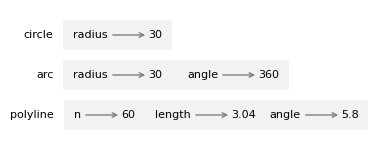

In [ ]:
from diagram import diagram, adjust

width, height, x, y = [3.58, 1.31, 0.98, 1.06]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
#adjust(x, y, bbox)

Notice that the value of `angle` in `polyline` is different from the value of `angle` in `arc`.
Parameters are local, which means you can use the same parameter name in different functions; it's a different variable in each function, and it can refer to a different value. 

## A development plan

A **development plan** is a process for writing programs.
The process we used in this chapter is "encapsulation and generalization".
The steps of this process are:

1.  Start by writing a small program with **no function** definitions.

2.  Once you get the program working, identify a coherent piece of it,
    **encapsulate** the piece in a function and give it a name.

3.  **Generalize** the function by adding appropriate parameters.

4.  **Repeat** Steps 1 to 3 until you have a set of working functions.

5.  Look for opportunities to improve the program by **refactoring**. For
    example, if you have similar code in several places, consider
    factoring it into an appropriately general function.

This process has some drawbacks -- we will see alternatives later -- but it can be useful if you don't know ahead of time how to divide the program into functions.
This approach lets you design as you go along.

The design of a function has two parts:

* The **interface** is how the function is used, including its name, the parameters it takes and what the function is supposed to do.

* The **implementation** is how the function does what it's supposed to do.

For example, here's the first version of `circle` we wrote, which uses `polygon`.

In [ ]:
def circle(radius):
    circumference = 2 * math.pi * radius
    n = 30
    length = circumference / n
    polygon(n, length)

And here's the refactored version that uses `arc`.

In [ ]:
def circle(radius):
    arc(radius,  360)

These two functions have the same interface -- they take the same parameters and do the same thing -- but they have different implementations.

## Glossary

```{glossary}
**interface design**
 A process for designing the interface of a function, which includes the parameters it should take.

**canvas**
 A window used to display graphical elements including lines, circles, rectangles, and other shapes.

**encapsulation**
 The process of transforming a sequence of statements into a function definition.

**generalization**
 The process of replacing something unnecessarily specific (like a number) with something appropriately general (like a variable or parameter).

**keyword argument**
 An argument that includes the name of the parameter.

**refactoring**
 The process of modifying a working program to improve function interfaces and other qualities of the code.

**development plan**
 A process for writing programs.

**docstring**
 A string that appears at the top of a function definition to document the function's interface.

**multiline string**
 A string enclosed in triple quotes that can span more than one line of a program.

**precondition**
 A requirement that should be satisfied by the caller before a function starts.

**postcondition**
 A requirement that should be satisfied by the function before it ends.
 ```